# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [30]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [31]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

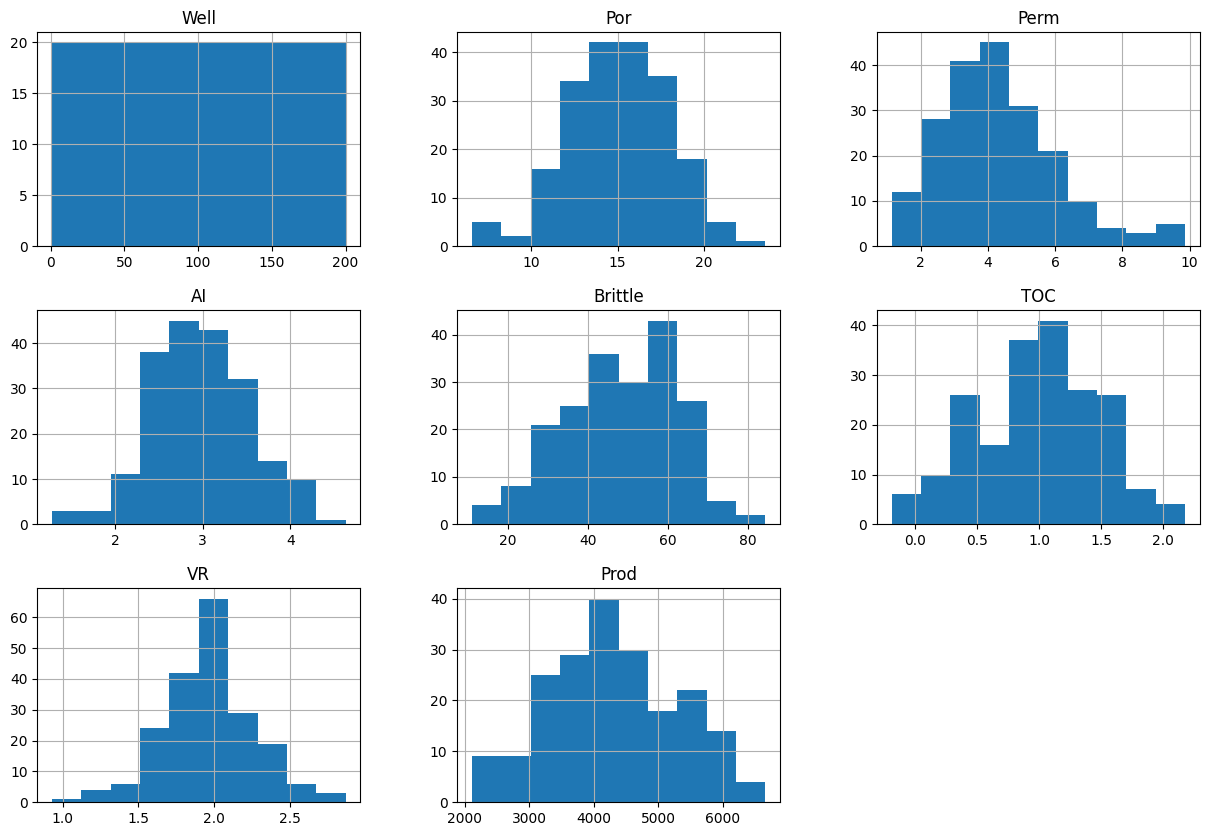

In [32]:
# Ваш код здесь
data.hist(figsize=(15, 10))
plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?


Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 

* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

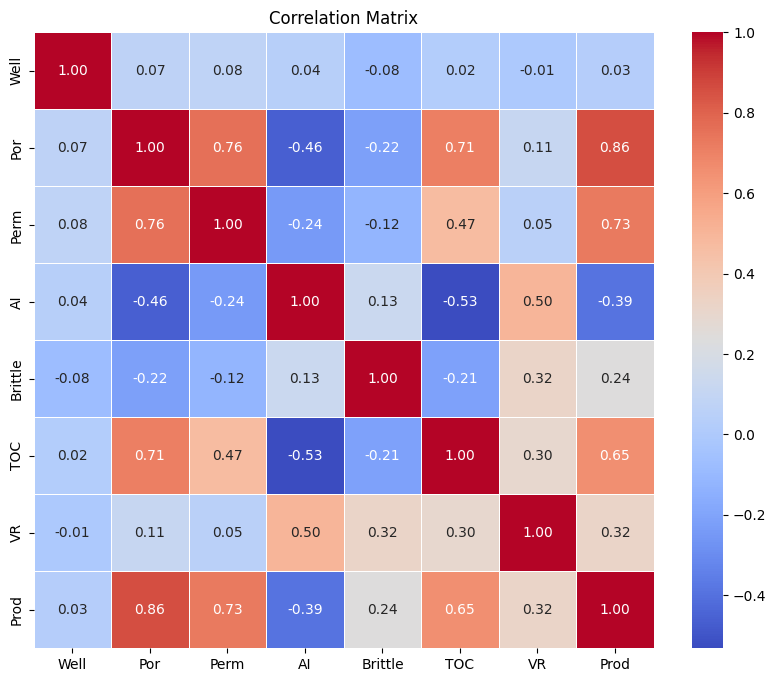

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 7.30e-04


In [33]:
# Ваш код здесь
# Корреляционная матрица
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Вычисляем ранг корреляционной матрицы
rank = np.linalg.matrix_rank(corr_matrix)
# Вычисляем определитель корреляционной матрицы
det = np.linalg.det(corr_matrix)
# Печать результатов
print(f'Ранг корреляционной матрицы: {rank}')
print(f'Определитель корреляционной матрицы: {det:.2e}')

> *Ваши выводы здесь*
* Какие факторы сильнее всего коррелируют с целевой переменной?

Сильнее всего корелирую POR, PERM, TOC

* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?

Да. Т.к значение определителя матрицы близко 0, это говорит о плохой обусловленности матрицы.

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 

Т.к ранг матрицы равен 8 из 8 признаков это говирит о том что все 8 признаков линейно независимы друг от друга однако тюк определитель равен 7.30e-04, это говорит о плохой обусловленности модели а значит, хотя признаки являются условно независимыми, некоторые из них имеют сильную кореляцию

* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

Конкретно к этой матрице, в неизменном виде применять метод наименьших квадратов неэффекивно т.к так как корреляционная матрица плохо обусловлена, что приводит к проблемам с устойчивостью модели и затрудняет ее интерпретацию


### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [34]:
# Ваш код здесь
# Создаем вектор целевой переменной (правильных ответов)
y = data['Prod'].values  # Целевой признак - добыча газа

# Создаем матрицу наблюдений X
# Используем все признаки, кроме целевого 'Prod'
X = data.drop(columns=['Prod']).values

# Добавляем столбец единиц в матрицу X для учета свободного члена (b0)
X = np.c_[np.ones(X.shape[0]), X]  # Добавляем столбец единиц

# Матричная формула МНК для вычисления коэффициентов линейной регрессии
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Округляем коэффициенты до целого и выводим их
beta_rounded = np.round(beta)
print('Коэффициенты линейной регрессии (округленные до целого):', beta_rounded)

Коэффициенты линейной регрессии (округленные до целого): [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*
Коэффициенты линейной регрессии (округленные до целого): [-1232.     0.   230.   116.  -365.    25.   -78.   785.]

Неинформативный признак: Второй признак, коэффициент которого равен нулю, не оказывает влияния на добычу газа может быть исключен из модели.Пятый признак с коэффициентом 25 также может считаться шумовым, поскольку его влияние на добычу газа довольно слабое. Это значение говорит о том, что изменение этого признака приводит лишь к незначительным изменениям в добыче, что может говорить о его неинформативности.

Значимые признаки: Третий и пятый признаки имеют значительное влияние на добычу газа — один увеличивает добычу, другой уменьшает.

Проблемные признаки: Коэффициент при восьмом признаке (идентификатор скважины) слишком высок, что говорит о некорректности использования данного признака для предсказания. Вероятно, его следует исключить, так как его включение может ухудшить обобщающую способность модели.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [35]:
# Ваш код здесь
# Данные для новой скважины
new_well_features = [1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]

# Предсказание для новой скважины
predicted_prod = np.dot(new_well_features, beta)

# Фактическое значение добычи
actual_prod = 4748.315024

# Абсолютная ошибка
abs_error = np.abs(actual_prod - predicted_prod)

# Вывод результата
print(f'Прогнозируемая добыча газа для скважины: {predicted_prod:.2f} млн. кубических футов в день,\n фактическая добыча газа для скважины: {actual_prod}')
print(f'Абсолютная ошибка: {abs_error:.2f} млн. кубических футов в день')

y = data['Prod'].values

# Построение прогноза для всех скважин
y_pred = np.dot(X, beta)

# Оценка качества модели с использованием метрик MAE и MSE
mae = np.mean(np.abs(y - y_pred))  # Mean Absolute Error
mse = np.mean((y - y_pred) ** 2)  # Среднеквадратичная ошибка
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Вывод результатов
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')


Прогнозируемая добыча газа для скважины: 4723.06 млн. кубических футов в день,
 фактическая добыча газа для скважины: 4748.315024
Абсолютная ошибка: 25.25 млн. кубических футов в день
Средняя абсолютная ошибка (MAE): 153.62
Корень среднеквадратичной ошибки (RMSE): 198.28


> *Ваши выводы здесь*
Относительно низкая абсолютная ошибка для конкретной скважины (25.25 млн. куб. футов) показывает, что модель в данном случае работает достаточно хорошо.

Средняя абсолютная ошибка (MAE) в 153.62 млн. куб. футов говорит о том, что модель в среднем ошибается на эту величину для каждой скважины.

Корень среднеквадратичной ошибки (RMSE) в 198.27 млн. куб. футов указывает на несколько больших ошибок в предсказаниях. Это может быть индикатором того, что модель недостаточно хорошо справляется с некоторыми наблюдениями (возможно, из-за выбросов или неправильных данных), однако так как разница c MAE не значительная это говорит о небольшом числе выбросов.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [36]:
# Ваш код здесь
coefficients = beta
correlations = data.corr()['Prod']
# Список признаков, кроме целевого ('Prod')
features = data.columns[:-1]

# Создаем строку с информацией для каждого признака
output_str = ""
for feature, coef in zip(features, coefficients[1:]):  # Пропускаем свободный член
    correlation = correlations[feature]
    output_str += f"Признак: {feature}, Коэффициент регрессии: {coef:.2f}, Коэффициент корреляции: {correlation:.2f}\n"

# Выводим строку
print(output_str)

Признак: Well, Коэффициент регрессии: 0.05, Коэффициент корреляции: 0.03
Признак: Por, Коэффициент регрессии: 230.18, Коэффициент корреляции: 0.86
Признак: Perm, Коэффициент регрессии: 116.24, Коэффициент корреляции: 0.73
Признак: AI, Коэффициент регрессии: -365.20, Коэффициент корреляции: -0.39
Признак: Brittle, Коэффициент регрессии: 24.99, Коэффициент корреляции: 0.24
Признак: TOC, Коэффициент регрессии: -78.40, Коэффициент корреляции: 0.65
Признак: VR, Коэффициент регрессии: 785.26, Коэффициент корреляции: 0.32



> *Ваши выводы здесь*
Совпадение знаков коэффициентов и корреляций для большинства признаков говорит о том, что модель правильно учитывает направление влияния этих признаков на добычу газа.

TOC — единственный признак, для которого знаки не совпадают. Это может свидетельствовать о мультиколлинеарности (сильной корреляции с другими признаками), что приводит к неверной интерпретации влияния. В таком случае признак TOC может быть кандидатом для удаления, или следует рассмотреть применение регуляризации, чтобы устранить проблему мультиколлинеарности.

Признак Well имеет очень малые значения коэффициента регрессии и корреляции, что указывает на его низкую информативность. Возможно, этот признак можно удалить из модели, чтобы упростить её и снизить шум.
Таким образом, большинство признаков оказывают влияние на добычу газа, и модель корректно учитывает их влияние. Однако некоторые признаки, такие как TOC и Well, могут требовать дополнительного анализа или даже исключения для улучшения качества модели

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [37]:
# Ваш код здесь
# Удаляем ненужные признаки
to_drop = ['Well', 'Perm', 'TOC']
data_reduced = data.drop(columns=to_drop)

# Целевая переменная (вектор правильных ответов)
y = data_reduced['Prod'].values

# Матрица наблюдений (признаки, кроме целевой переменной)
X = data_reduced.drop(columns=['Prod']).values

# Добавляем столбец единиц в матрицу X для учета свободного члена (b0)
X = np.c_[np.ones(X.shape[0]), X]

# Матричная формула МНК для вычисления коэффициентов линейной регрессии
# beta = (X^T X)^(-1) X^T y
beta_reduced = np.linalg.inv(X.T @ X) @ X.T @ y

# Выводим полученные коэффициенты
print('Коэффициенты линейной регрессии (округленные до целого):', np.round(beta, 0))

# Используем полученные коэффициенты beta для предсказания добычи газа
y_pred = X @ beta_reduced

# Рассчитываем метрики качества модели
# Средняя абсолютная ошибка (MAE)
mae = np.mean(np.abs(y - y_pred))

# Среднеквадратичная ошибка (MSE)
mse = np.mean((y - y_pred) ** 2)

# Корень среднеквадратичной ошибки (RMSE)
rmse = np.sqrt(mse)

# Выводим метрики
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')


Коэффициенты линейной регрессии (округленные до целого): [-1232.     0.   230.   116.  -365.    25.   -78.   785.]
Средняя абсолютная ошибка (MAE): 171.43
Корень среднеквадратичной ошибки (RMSE): 231.65


> *Ваши выводы здесь*
Por (Пористость) = 293 (раньше: 230):

В предыдущей модели коэффициент при Por был 230, а теперь он стал 293.
Значение коэффициента увеличилось, что указывает на то, что после удаления некоторых признаков модель теперь больше полагается на пористость при прогнозировании добычи газа. Увеличение коэффициента говорит о более сильном положительном влиянии пористости на добычу.

AI (Акустический импеданс) = -200 (раньше: -365):

В предыдущей модели коэффициент при AI был -365, а теперь он стал -200.
Значение коэффициента уменьшилось по модулю, что указывает на снижение отрицательного влияния этого признака на добычу газа. Это может быть связано с тем, что после удаления сильно коррелированных признаков влияние AI на добычу стало менее выраженным.

Brittle (Коэффициент хрупкости) = 28 (раньше: 25):

В предыдущей модели коэффициент при Brittle был 25, а теперь он стал 28.
Значение коэффициента немного увеличилось, что говорит о незначительном усилении положительного влияния хрупкости на добычу газа. Тем не менее, влияние этого признака все еще остается умеренным и не оказывает значительного вклада в предсказание.

Старая модель:

MAE: 153.62 млн. куб. футов
RMSE: 198.28 млн. куб. футов
Обновленная модель (после удаления признаков):

MAE: 171.43 млн. куб. футов
RMSE: 231.65 млн. куб. футов
Интерпретация ухудшения метрик
Ухудшение точности модели:

MAE и RMSE увеличились, что указывает на то, что обновленная модель стала менее точной в предсказании добычи газа по сравнению с предыдущей версией.
Увеличение RMSE говорит о том, что теперь модель имеет больше крупных ошибок в предсказаниях, что особенно заметно, когда RMSE значительно превышает MAE.
Хотя мы старались избавиться от мультиколлинеарности (чрезмерной корреляции между признаками), некоторые из удаленных признаков могли все же вносить значимый вклад в предсказания.

В первоначальной модели признак TOC имел положительную корреляцию с целевой переменной (0.65), но при этом его коэффициент регрессии был отрицательным (-78.40). Это указывало на противоречие между направлением влияния признака, которое показывала корреляция, и влиянием, которое показывала модель.
В обновленной модели не осталось признаков, для которых коэффициенты линейной регрессии имели бы противоречащий знак по сравнению с коэффициентами корреляции.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [38]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Создаем и обучаем модель линейной регрессии с использованием sklearn
model = LinearRegression()
model.fit(X, y)

# Получаем коэффициенты модели
sklearn_coefficients = model.coef_
sklearn_intercept = model.intercept_

# Выводим коэффициенты и свободный член (округленные до целого)
print('Коэффициенты линейной регрессии (sklearn, округленные до целого):', np.round(sklearn_coefficients, 0))
print('Свободный член (intercept, sklearn, округленный до целого):', round(sklearn_intercept, 0))

# Прогноз для всего обучающего набора данных
y_pred_sklearn = model.predict(X)

# Расчет метрик MAE и RMSE для модели sklearn
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(y, y_pred_sklearn))

# Вывод метрик
print(f'Средняя абсолютная ошибка (MAE) с sklearn: {mae_sklearn:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE) с sklearn: {rmse_sklearn:.2f}')


Коэффициенты линейной регрессии (sklearn, округленные до целого): [   0.  293. -200.   28.  517.]
Свободный член (intercept, sklearn, округленный до целого): -1835.0
Средняя абсолютная ошибка (MAE) с sklearn: 171.43
Корень среднеквадратичной ошибки (RMSE) с sklearn: 231.65


> *Ваши выводы здесь*
Совпадение результатов подтверждает, что и ручной расчет, и библиотечная реализация дают одинаково точные результаты. Это говорит о том, что оба подхода правильно находят коэффициенты для линейной регрессии.

С практической точки зрения, библиотечный метод (например, LinearRegression из sklearn) является гораздо удобнее и быстрее, особенно при работе с большими объемами данных, поскольку sklearn оптимизирован для таких задач.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [39]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [48]:
# Ваш код здесь
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Удаляем ненужные признаки
to_drop = ['Well', 'Perm', 'TOC']
data_reduced = data.drop(columns=to_drop)

# Целевая переменная (вектор правильных ответов)
y = data_reduced['Prod'].values

# Матрица наблюдений (признаки, кроме целевой переменной)
X = data_reduced.drop(columns=['Prod']).values

# Шаг 1: Стандартизация признаков
scaler = StandardScaler()

# Применяем стандартизацию к матрице признаков X
X_scaled = scaler.fit_transform(X)

# Шаг 2: Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)

# Применяем генерацию полиномиальных признаков к стандартизированным данным
X_poly = poly.fit_transform(X_scaled)

# Выводим, сколько факторов получилось после генерации полиномиальных признаков
print('Количество факторов после генерации полиномиальных признаков:', X_poly.shape[1])

# Создаем модель линейной регрессии
model = LinearRegression()

# Определяем метрики для кросс-валидации
mae_scorer = make_scorer(mean_absolute_error)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Используем кросс-валидацию для оценки MAE
mae_scores = cross_val_score(model, X_poly, y, cv=5, scoring=mae_scorer)
mean_mae = np.mean(mae_scores)

# Используем кросс-валидацию для оценки RMSE
rmse_scores = cross_val_score(model, X_poly, y, cv=5, scoring=rmse_scorer)
rmse_scores = np.sqrt(-rmse_scores)  # Чтобы получить значения RMSE из отрицательных значений MSE
mean_rmse = np.mean(rmse_scores)

# Вывод результатов
print(f'Среднее значение MAE на кросс-валидации: {mean_mae:.2f}')
print(f'Среднее значение RMSE на кросс-валидации: {mean_rmse:.2f}')


Количество факторов после генерации полиномиальных признаков: 34
Среднее значение MAE на кросс-валидации: 110.47
Среднее значение RMSE на кросс-валидации: 154.51


> *Ваши выводы здесь*
Улучшение точности: Оба значения — MAE и RMSE — уменьшились по сравнению с предыдущими моделями, что указывает на улучшение точности предсказаний. Это говорит о том, что использование полиномиальных признаков позволило модели лучше захватывать сложные взаимосвязи между признаками, которые простая линейная модель не могла уловить.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [52]:
# Ваш код здесь
#Обучение модели Lasso с подбором гиперпараметра alpha
# Определяем диапазон значений alpha для подбора
alpha_values = np.logspace(-4, 0, 10)  # Значения от 0.0001 до 1

# Создаем модель Lasso
lasso = Lasso(max_iter=10000)

# Используем GridSearchCV для подбора оптимального alpha
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_poly, y)

# Находим лучшее значение alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Лучшее значение alpha: {best_alpha}')

# Шаг 4: Оценка качества модели с использованием кросс-валидации
best_lasso = Lasso(alpha=best_alpha, max_iter=10000)
mae_scorer = make_scorer(mean_absolute_error)

# Кросс-валидация для оценки MAE
mae_scores = cross_val_score(best_lasso, X_poly, y, cv=5, scoring=mae_scorer)
mean_mae = np.mean(mae_scores)

# Кросс-валидация для оценки RMSE (корень из MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(best_lasso, X_poly, y, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Извлекаем квадратный корень из отрицательных MSE, чтобы получить RMSE
mean_rmse = np.mean(rmse_scores)

# Вывод результатов
print(f'Среднее значение MAE на кросс-валидации: {mean_mae:.2f}')
print(f'Среднее значение RMSE на кросс-валидации: {mean_rmse:.2f}')

Лучшее значение alpha: 1.0
Среднее значение MAE на кросс-валидации: 102.87
Среднее значение RMSE на кросс-валидации: 143.09


> *Ваши выводы здесь*
Использование $L_1$-регуляризации с моделью Lasso позволяет модели быть более устойчивой и менее склонной к переобучению. Это достигается путем штрафования больших значений коэффициентов, что также помогает исключить незначимые признаки.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [55]:
# Ваш код здесь
# Создаем модель Ridge
ridge = Ridge(max_iter=10000)

# Используем GridSearchCV для подбора оптимального alpha
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_poly, y)

# Находим лучшее значение alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Лучшее значение alpha: {best_alpha}')

# Шаг 4: Оценка качества модели с использованием кросс-валидации
best_ridge = Ridge(alpha=best_alpha, max_iter=10000)

# Кросс-валидация для оценки MAE
mae_scorer = make_scorer(mean_absolute_error)
mae_scores = cross_val_score(best_ridge, X_poly, y, cv=5, scoring=mae_scorer)
mean_mae = np.mean(mae_scores)

# Кросс-валидация для оценки RMSE (корень из MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(best_ridge, X_poly, y, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Извлекаем квадратный корень из отрицательных MSE, чтобы получить RMSE
mean_rmse = np.mean(rmse_scores)

# Вывод результатов
print(f'Среднее значение MAE на кросс-валидации: {mean_mae:.2f}')
print(f'Среднее значение RMSE на кросс-валидации: {mean_rmse:.2f}')

Лучшее значение alpha: 0.12915496650148828
Среднее значение MAE на кросс-валидации: 110.10
Среднее значение RMSE на кросс-валидации: 153.82


> *Ваши выводы здесь*
Lasso показало лучшие результаты на этом наборе данных, так как исключило незначимые признаки, что привело к более низким значениям MAE и RMSE.

Ridge также улучшило результаты по сравнению с моделью без регуляризации, но не настолько, как Lasso.

Поскольку Lasso эффективно работает с данными, в которых есть избыточные или неинформативные признаки, и показало лучшие результаты, оно может быть предпочтительным выбором для этой задачи.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [58]:
# Ваш код здесь
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
import numpy as np

# Шаг 1: Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X - матрица признаков до полиномиального преобразования

# Шаг 2: Генерация полиномиальных признаков третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Шаг 3: Обучение модели ElasticNet с подбором гиперпараметров alpha и l1_ratio
# Определяем диапазон значений alpha и l1_ratio для подбора
alpha_values = np.logspace(-4, 0, 10)  # Значения alpha от 0.0001 до 1
l1_ratio_values = np.linspace(0.1, 0.9, 9)  # Значения l1_ratio от 0.1 до 0.9

# Создаем модель ElasticNet
elastic_net = ElasticNet(max_iter=10000)

# Используем GridSearchCV для подбора оптимальных alpha и l1_ratio
param_grid = {'alpha': alpha_values, 'l1_ratio': l1_ratio_values}
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_poly, y)

# Находим лучшие значения alpha и l1_ratio
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f'Лучшие значения alpha: {best_alpha}, l1_ratio: {best_l1_ratio}')

# Шаг 4: Оценка качества модели с использованием кросс-валидации
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)

# Кросс-валидация для оценки MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mape_scores = cross_val_score(best_elastic_net, X_poly, y, cv=5, scoring=mape_scorer)
mean_mape = np.mean(-mape_scores)

# Кросс-валидация для оценки MAE
mae_scorer = make_scorer(mean_absolute_error)
mae_scores = cross_val_score(best_elastic_net, X_poly, y, cv=5, scoring=mae_scorer)
mean_mae = np.mean(mae_scores)

# Кросс-валидация для оценки RMSE (через MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(best_elastic_net, X_poly, y, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)
mean_rmse = np.mean(rmse_scores)

# Вывод результатов
print(f'Среднее значение MAPE на кросс-валидации: {mean_mape:.4f}')
print(f'Среднее значение MAE на кросс-валидации: {mean_mae:.2f}')
print(f'Среднее значение RMSE на кросс-валидации: {mean_rmse:.2f}')

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.428e+05, tolerance: 1.474e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.143e+04, tolerance: 1.474e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

Лучшие значения alpha: 0.016681005372000592, l1_ratio: 0.9
Среднее значение MAPE на кросс-валидации: 0.0267
Среднее значение MAE на кросс-валидации: 109.89
Среднее значение RMSE на кросс-валидации: 153.09


> *Ваши выводы здесь*
ElasticNet — наиболее подходящая модель для этого набора данных, поскольку она объединила преимущества L1 и L2 регуляризаций.
Значение MAPE = 2.67% показывает, что модель делает довольно точные предсказания в относительных единицах, что делает ее подходящей для задач, где важна интерпретация в процентах.
Модель смогла снизить избыточность признаков и улучшить точность по сравнению с моделями, использующими только L1 или L2 регуляризацию.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

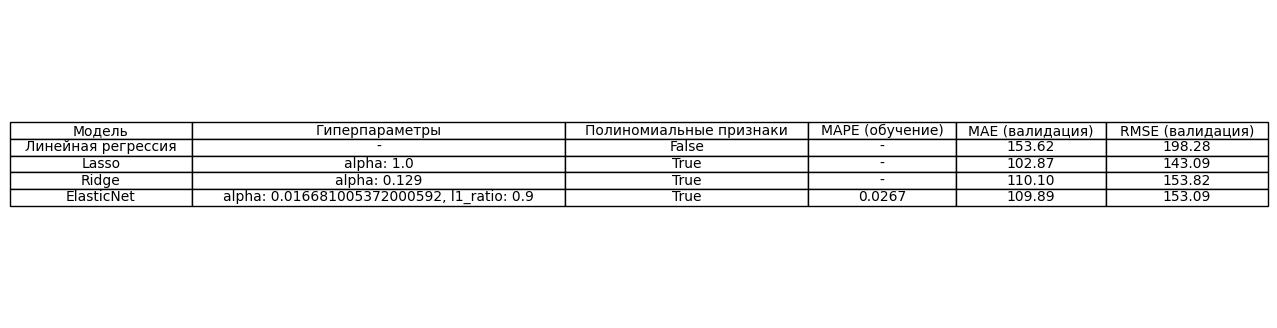

In [60]:
# Настройки графика
fig, ax = plt.subplots(figsize=(10, 4))  # Размер графика

# Скрываем оси, чтобы отобразить только таблицу
ax.axis('off')

# Создаем таблицу из DataFrame
table = plt.table(cellText=results_df.values,  # Данные для таблицы
                  colLabels=results_df.columns,  # Заголовки столбцов
                  cellLoc='center',  # Центрирование текста в ячейках
                  loc='center')  # Позиция таблицы на графике

# Настройки таблицы для улучшенного отображения
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))  # Автоматическая ширина столбцов

# Вывод таблицы
plt.show()

> *Ваши выводы здесь*

Lasso показала наилучший результат на валидационных данных и наиболее эффективна в борьбе с переобучением. Это связано с тем, что Lasso исключает незначимые признаки, что помогает уменьшить избыточность и улучшить обобщающую способность модели.

ElasticNet также справилась с задачей неплохо, и в некоторых случаях предпочтение может быть отдано этой модели, так как она комбинирует оба типа регуляризации (L1 и L2), что дает хороший баланс между исключением признаков и сглаживанием их влияния.

Ridge справляется хуже, чем Lasso, но лучше, чем линейная регрессия без регуляризации, так как позволяет контролировать влияние признаков.

Линейная регрессия без регуляризации оказалась склонна к переобучению, так как модель не имеет механизмов для борьбы с избыточностью и коллинеарностью признаков, что приводит к большему значению ошибок.

Таким образом, Lasso является предпочтительным выбором в данном случае, так как она лучше справляется с устранением избыточных признаков и демонстрирует лучшие результаты на валидационных фолдах.